# Autoencoder In String Theory

## Dependences

In [1]:
import torch.nn.functional as F
from torch.optim import lr_scheduler
import torch.optim as optim
import torch.nn as nn
import torch
import pandas as pd
import data as data
import runtimes as runtimes
import utils as utils

## Setup

### Neural Network

In [2]:
class Net(nn.Module):

    def __init__(self, dimensions):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(dimensions[0], dimensions[1])
        self.fc2 = nn.Linear(dimensions[1], dimensions[2])
        self.fc3 = nn.Linear(dimensions[2], dimensions[3])
        self.fc4 = nn.Linear(dimensions[3], dimensions[4])
        self.fc5 = nn.Linear(dimensions[4], dimensions[5])

        self.fc6 = nn.Linear(dimensions[5], dimensions[6])
        self.fc7 = nn.Linear(dimensions[6], dimensions[7])
        self.fc8 = nn.Linear(dimensions[7], dimensions[8])
        self.fc9 = nn.Linear(dimensions[8], dimensions[9])
        self.fc10 = nn.Linear(dimensions[9], dimensions[10])

    def encode(self, Layer):
        Layer = F.leaky_relu(self.fc1(Layer))
        Layer = F.leaky_relu(self.fc2(Layer))
        Layer = F.leaky_relu(self.fc3(Layer))
        Layer = F.leaky_relu(self.fc4(Layer))
        Layer = F.leaky_relu(self.fc5(Layer))
        return Layer

    def decode(self, Layer):
        Layer = F.leaky_relu(self.fc6(Layer))
        Layer = F.leaky_relu(self.fc7(Layer))
        Layer = F.leaky_relu(self.fc8(Layer))
        Layer = F.leaky_relu(self.fc9(Layer))
        Layer = F.leaky_relu(self.fc10(Layer))
        return Layer

    def forward(self, Layer):
        return self.decode(self.encode(Layer))

### Parameters

In [3]:
# Name input dataset
datasetname = './data/600K_Z8-Z12.csv'

# ohe and features lenghts
lenghts_data = data.lenghts_features(datasetname) 
l_ohe = sum(lenghts_data)

# latent space dimension
latent = 3

# Dimensions of layers 
dimensions = [l_ohe, 2*l_ohe, 200, 26, 13, latent, 13, 26, 200, 2*l_ohe, l_ohe]

# Number of epochs for train
epochs = 1

# Parameters for dataset train
train_set = 0.6
seed = 1
batchsize = 32
workers = 8

# label train log
label = "1_e_leaky"

### Instantiation

In [4]:
parameters = {"datasetname":datasetname,
             "seed":1,
             "epochs": epochs,
             "train_set": train_set,
             "batchsize": batchsize,
             "workers": workers,
             "label":label,
             "lenghts_data":lenghts_data,
             "latent": latent}


model = Net(dimensions)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = lr_scheduler.StepLR(optimizer, step_size= 4000, gamma=0.1)

## Training

In [5]:
%%time
runtimes.train(model, criterion, optimizer, scheduler, **parameters)

Preparing data
Using GPU
Start training
--------------------------------------------------
Epoch 1/1
train Loss: 1.1232 Acc: 7.2814
--------------------------------------------------
Epoch 1/1
valid Loss: 0.9678 Acc: 8.6487
CPU times: user 2min 16s, sys: 3.47 s, total: 2min 19s
Wall time: 2min 22s


## Reporting


Los resultados estan contenidos en dos directorios
* savedmodels
* reports

### Loss and accuracy

In [6]:
# list of reports
!ls reports

log_loss_accuracy-1_e_leaky


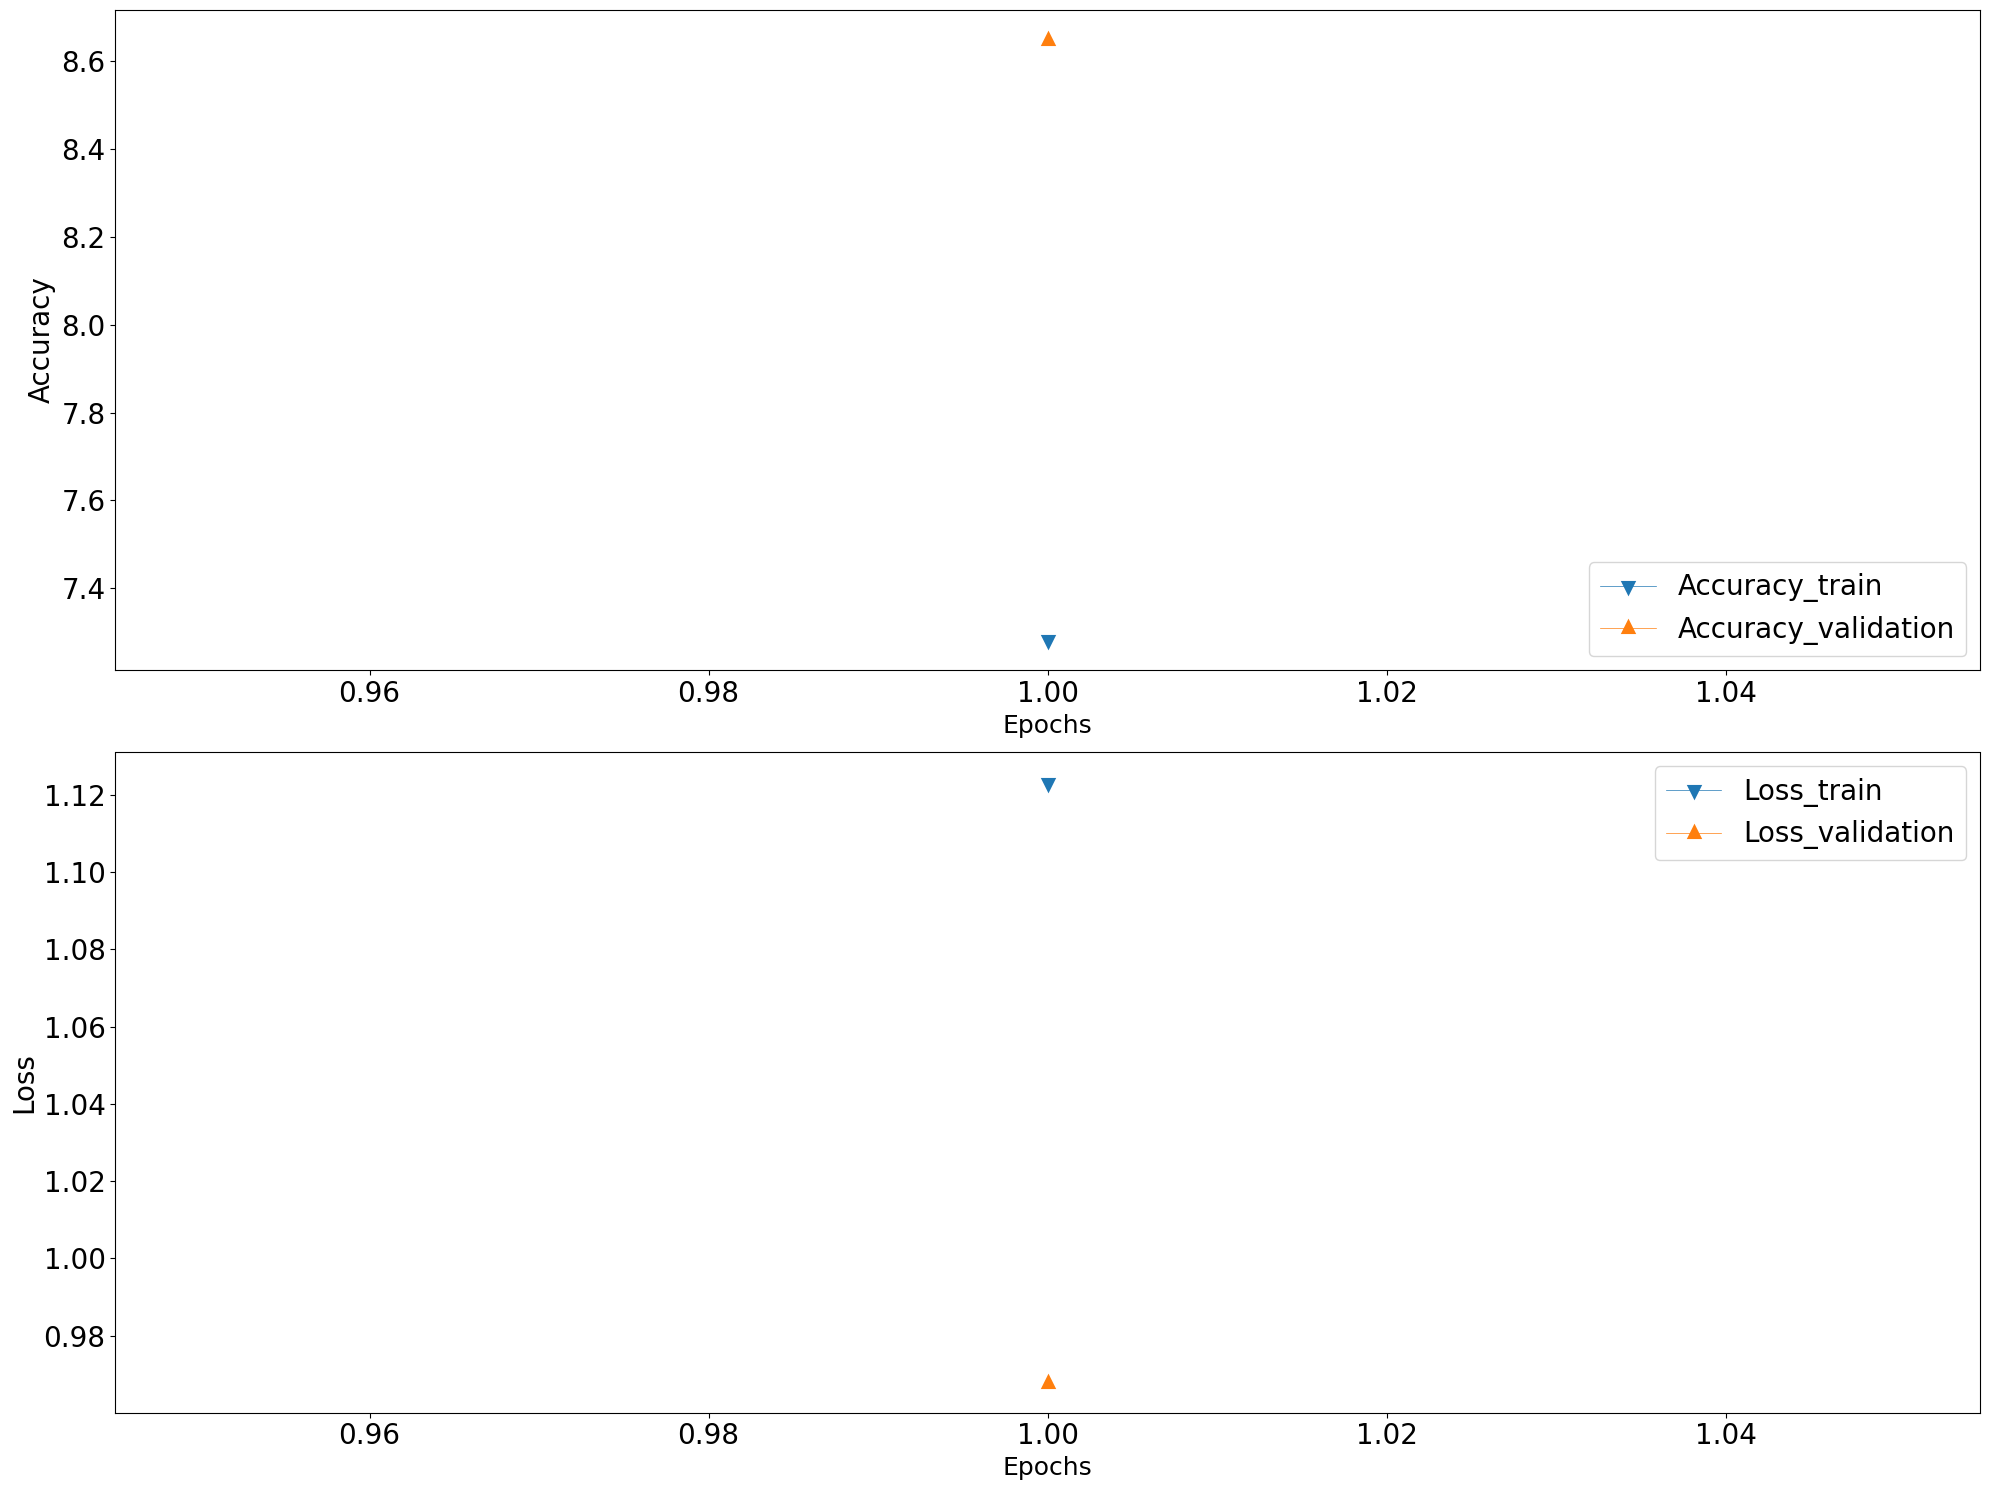

In [7]:
utils.plot_report(label)

### Reconstruction

A partir de los modelos guardados podemos generar reportes del espacio latente y del número de aciertos 
para cada caracteristica

Podemos ver el estado de los modelos guardado y elegir uno

In [8]:
# list of saved models
!ls savedModels

model-best-1_e_leaky.pt  Trained_Machine.pt


In [9]:
%%time
runtimes.reconstruction(model, "model-best-1_e_leaky", **parameters)

Preparing data
Load model
Construction latent space
Construction of success each feature
CPU times: user 36min 57s, sys: 8.38 s, total: 37min 6s
Wall time: 6min 9s


### Success by features

In [10]:
!ls success

success_model-best-1_e_leaky  success_model-best-1_e_leaky_to_1_trained_epochs


In [11]:
!head ./success/success_model-best-1_e_leaky_to_1_trained_epochs

13,1,1,0,1,0,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1
16,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1
11,1,1,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1
6,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,1
17,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
14,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1
12,0,0,1,0,1,0,1,1,1,0,1,0,1,0,1,1,1,0,1,1
5,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1
6,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1


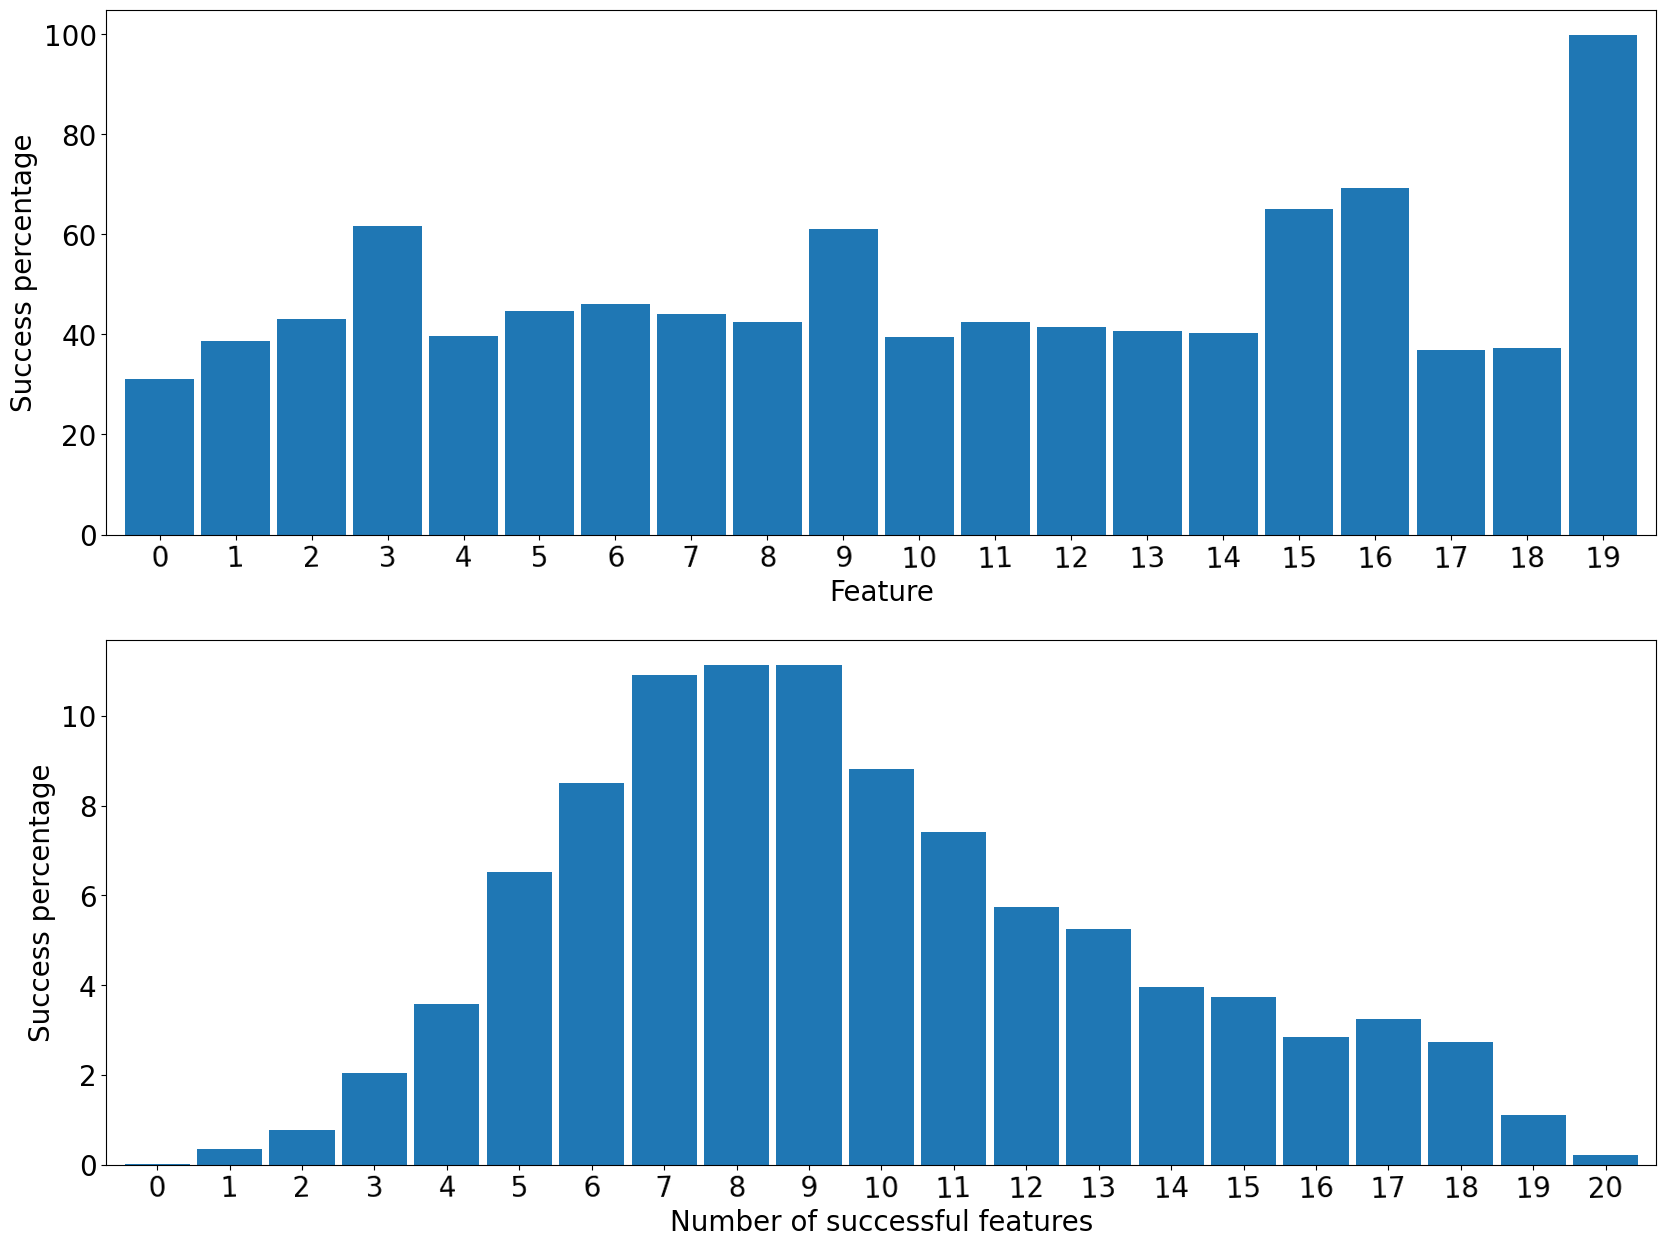

In [12]:
utils.plot_features_statistics("success_model-best-1_e_leaky_to_1_trained_epochs")

### Latent space

In [16]:
!ls latentSpaces

latent_z12_model-best-1_e_leaky
latent_z12_model-best-1_e_leaky_to_1_trained_epochs
latent_z8_model-best-1_e_leaky
latent_z8_model-best-1_e_leaky_to_1_trained_epochs


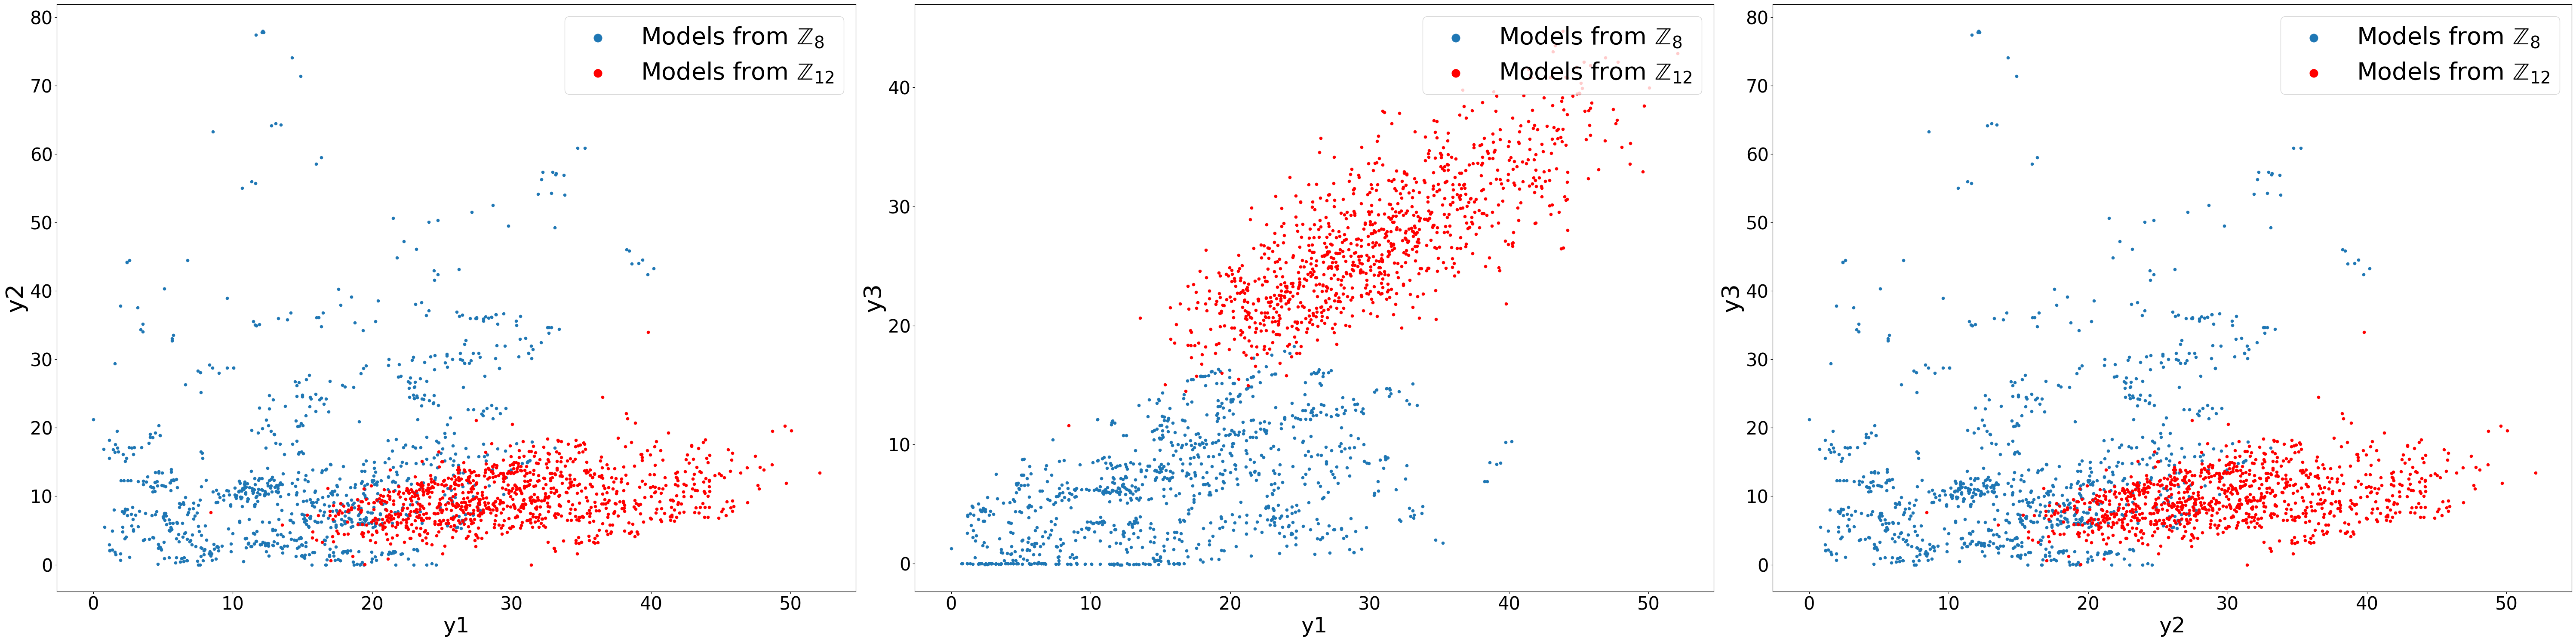

In [14]:
# IMPORTANT: order z8 first
utils.plot_2d_latent_space("latent_z8_model-best-1_e_leaky_to_1_trained_epochs", "latent_z12_model-best-1_e_leaky_to_1_trained_epochs")

In [15]:

# Name other dataset
datasetname_othermodels = './Data/Z12_SU5_100models.csv' 